# <b>Section 3: Data Modeling</b>

### <b><u>Step 0</u>: Download library for support</b>

In [ ]:
! pip install ipynb

### <b><u>Step 1</u>: Import library</b>

These are the main libraries used for data crawling:
- `sys`: Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
- `numpy`: used to get spotipy's client_id, secret and redirect uri in .env file
- `pandas`: used to get accessed to .env files in system
- `matplotlib`: used to support write data to csv files
- `sklearn`: used to support write data to csv files

In [1]:
import sys
sys.path.insert(0, '../../data_exploration/components/')
sys.path.insert(0, '../../data')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from ipynb.fs.full.songs_data_exploration import songs_model_df

In [3]:
songs_model_np = songs_model_df.to_numpy()
songs_model_np

array([[58961886,      100,      183, ...,   201391,        3,       92],
       [  100162,       77,      182, ...,   197333,        2,       62],
       [   39690,       56,      182, ...,   281493,        1,       62],
       ...,
       [  406126,       72,      184, ...,   210142,        1,       60],
       [ 5033038,       79,      184, ...,   172600,        1,       60],
       [29951055,      100,      182, ...,   224341,        2,       60]])

In [6]:
k_mean_5 = KMeans(n_clusters=5)
k_mean_5.fit(songs_model_np)
label_5 = k_mean_5.labels_
label_5

array([1, 0, 0, ..., 0, 0, 4], dtype=int32)

In [19]:
metrics.silhouette_score(songs_model_np, label_5, metric='euclidean')

0.8031405376010732

In [9]:
metrics.calinski_harabasz_score(songs_model_np, label_5)

43149.81889525637

In [10]:
sum_distances = []
K = range(1,15)
for k in K:
  k_mean = KMeans(n_clusters=k)
  k_mean.fit(songs_model_np)
  sum_distances.append(k_mean.inertia_)

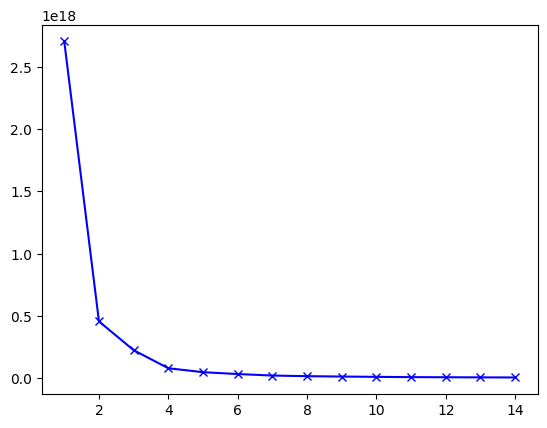

In [11]:
plt.plot(K, sum_distances, 'bx-')
plt.show()

In [36]:
k_mean_3 = KMeans(n_clusters=3)
model = k_mean_3.fit(songs_model_np)
result = k_mean_3.labels_

In [25]:
metrics.silhouette_score(songs_model_np, result, metric='euclidean')

0.8146704842028863

In [26]:
metrics.calinski_harabasz_score(songs_model_np, result)

16672.56286136346

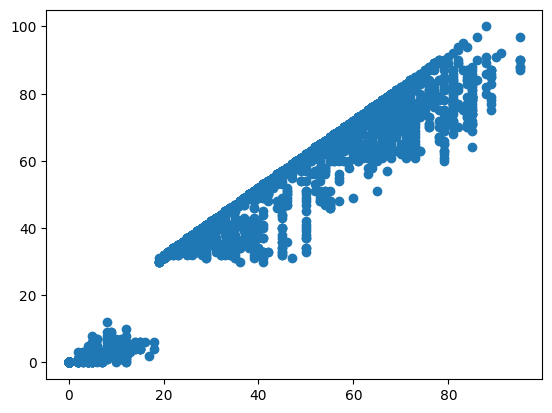

In [27]:
plt.scatter(songs_model_np[:,3], songs_model_np[:,-1])
plt.show()

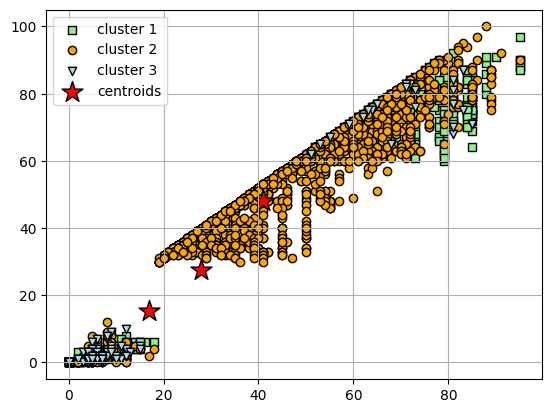

In [29]:
plt.scatter(
    songs_model_np[result == 0, 3], songs_model_np[result == 0, -1],
    c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    songs_model_np[result == 1, 3], songs_model_np[result == 1, -1],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    songs_model_np[result == 2, 3], songs_model_np[result == 2, -1],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model.cluster_centers_[:, 3], model.cluster_centers_[:, -1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [31]:
songs_model_df.shape

(3000, 7)

In [33]:
df = pd.read_csv('../../data/songs_data.tsv', delimiter='\t')
df.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
0,1RDvyOk4WtPCtoqciJwVn8,Dreamers [Music from the FIFA World Cup Qatar ...,"Jung Kook,BTS,FIFA Sound","k-pop boy group,k-pop","5382641,58715441,167875","80,92,77",183,Dreamers [Music from the FIFA World Cup Qatar ...,2022-11-20,81,201391,False,92
1,6A1IbMKwjvXibcrU1sdqKH,Em Là,"MONO,Onionn",NaN,"100123,2809","54,55",182,22,2022-08-18,60,197333,False,62
2,7bFFUPBiF15n8m8RziqS4o,dự báo thời tiết hôm nay mưa,GREY D,v-pop,39690,56,182,dự báo thời tiết hôm nay mưa – Maxi Single,2022-11-22,52,281493,False,62
3,4QjxvzEFwb63NZ1pp3wvHy,Chết Trong Em,Thịnh Suy,"vietnamese singer-songwriter,v-pop",359817,54,183,Chết Trong Em,2022-10-31,50,256663,False,62
4,5p8ThxM2OhJ0igfxkz0Z1q,Wild Flower (with youjeen),RM,k-rap,12005881,81,183,Indigo,2022-12-02,85,273499,False,88


In [34]:
df['cluster'] = result

In [35]:
songs_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   artist_followers   3000 non-null   int64
 1   artist_popularity  3000 non-null   int64
 2   markets            3000 non-null   int64
 3   album_popularity   3000 non-null   int64
 4   duration           3000 non-null   int64
 5   artists_count      3000 non-null   int64
 6   popularity         3000 non-null   int64
dtypes: int64(7)
memory usage: 187.5 KB


In [37]:
def recommend(model, follow, art_pop, market, alb_pop, duration, artist_count, popular):
  arr = np.array([[follow, art_pop, market, alb_pop, duration, artist_count, popular]])
  pred = model.predict(arr)
  return df[df['cluster'] == pred[0]].sample(10)

In [38]:
follow = 10000000
art_pop = 80
market = 180
alb_pop = 80
duration = 180000
artist_count = 1
popular = 80

recommend(model, follow, art_pop, market, alb_pop, duration, artist_count, popular)

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity,cluster
342,6NyCTXt6FORByQyLzG0T6a,Fa La La,"Justin Bieber,Boyz II Men","pop,r&b,new jack swing,boy band,canadian pop,u...","68258556,2638539","91,67",95,Def Jam Christmas,2022-12-02,8,185560,False,5,0
39,19K4laX9DYOAvChgt2VKnQ,willow,Taylor Swift,pop,64023844,100,94,New Year Driving,2022-12-17,0,214706,False,0,0
384,1kDCBSUOVFCSddvAGSwFCs,Mistletoe,Justin Bieber,"canadian pop,pop",68258556,91,94,Cañonazos de Pop en Diciembre,2022-12-16,0,183066,False,0,0
1807,2WnAKZefdRHxtBEkRjFOHC,Anyone,Justin Bieber,"canadian pop,pop",68258556,91,184,Justice,2021-03-19,84,190779,False,73,0
353,3qroJXFJd0H4ztwTCyTCJd,Ghost,Justin Bieber,"canadian pop,pop",68258556,91,95,Best of 2022: Sad Songs,2022-12-17,0,153190,False,0,0
237,2iAk5AwTklyS95hDy0aZ3R,Starboy,"The Weeknd,Daft Punk","pop,filter house,canadian pop,canadian contemp...","54398701,9068262","96,81",94,Krafttraining 2023,2022-12-17,0,230461,True,0,0
821,39OiseUFHNWgfbksUJwH8J,bad guy,Billie Eilish,"art pop,pop,electropop",73354459,89,95,NYÅRSMIDDAG,2022-12-17,0,194087,False,0,0
65,0mvRAABEoEYQ32uJfnQAzn,Anti-Hero,Taylor Swift,pop,64023844,100,95,Best Pop of 2022,2022-12-17,0,200690,False,0,0
330,4N4tdpwsdiPTXX6A7nEbJS,Mistletoe,Justin Bieber,"canadian pop,pop",68258556,91,95,Night Before Christmas,2022-12-06,8,183066,False,4,0
2554,73SpzrcaHk0RQPFP73vqVR,No Time To Die,Billie Eilish,"art pop,pop,electropop",73354459,89,184,No Time To Die,2020-02-13,65,242265,False,77,0
